In [5]:
## for storing the dataset
# from dataset import create_small_dataset
# !mkdir ./data/sm0llest
# create_small_dataset("./data/train/", 100, "./data/sm0llest/")
# import wandb
# wandb.init(project="wall_jepa")
# artifact = wandb.Artifact("sm0llest", type="dataset")
# artifact.add_dir("./data/sm0llest")
# wandb.log_artifact(artifact)

In [5]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from dataset import create_wall_dataloader
dl = create_wall_dataloader("../data/sm0ll/")

Loading data from ../data/sm0ll/ ...
Dataset size: 10000
States shape: (10000, 17, 2, 65, 65)
Actions shape: (10000, 16, 2)
Dataset size: 30000
States shape: (30000, 17, 2, 65, 65)
Actions shape: (30000, 16, 2)


In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def debug_trajectory_visualization(dl, index=1, debug=False):
    print(f"Debugging trajectory visualization for index {index}")
    
    # Get the sample
    sample = dl.dataset[index]
    
    print("Sample structure:")
    print(f"States shape: {sample.states.shape}")
    print(f"Actions shape: {sample.actions.shape}")
    print(f"Locations shape: {sample.locations.shape}")
    
    # Check if states and actions have the same number of time steps
    if sample.states.shape[0] != sample.actions.shape[0]:
        print("WARNING: Number of time steps in states and actions do not match!")
        print(f"States time steps: {sample.states.shape[0]}")
        print(f"Actions time steps: {sample.actions.shape[0]}")
    
    # Print some statistics
    print("\nStatistics:")
    print(f"States min: {sample.states.min().item():.4f}, max: {sample.states.max().item():.4f}")
    print(f"Actions min: {sample.actions.min().item():.4f}, max: {sample.actions.max().item():.4f}")
    
    # Move tensors to CPU and convert to numpy arrays
    states_np = sample.states.cpu().numpy()
    actions_np = sample.actions.cpu().numpy()


    if debug:
        for i in range(states_np.shape[0]):
            fig, ax = plt.subplots(figsize=(4, 4))
            ax.imshow(states_np[i, 0], cmap='gray')
            ax.imshow(states_np[i, 1], cmap='jet', alpha=0.5)
            ax.set_title(f"State {i}")
            plt.show()
            
            if i < actions_np.shape[0]:
                print(f"Action {i}: {actions_np[i]}")
            else:
                print("No action (final state)")
            print("\n" + "-"*50 + "\n")
        
        return None
    
    # Create the figure and axes
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle("Trajectory Visualization")
    
    # Initialize the plots
    wall_img = ax1.imshow(states_np[0, 0], cmap='gray')
    agent_img = ax1.imshow(states_np[0, 1], cmap='jet', alpha=0.5)
    ax1.set_title("Agent's View")
    
    action_lines = [ax2.plot([], [], label=f'Action {i+1}')[0] for i in range(actions_np.shape[1])]
    ax2.set_xlim(0, len(actions_np) - 1)
    ax2.set_ylim(actions_np.min(), actions_np.max())
    ax2.set_title("Actions")
    ax2.legend()
    
    # Animation update function
    def update(frame):
        wall_img.set_array(states_np[frame, 0])
        agent_img.set_array(states_np[frame, 1])
        
        for i, line in enumerate(action_lines):
            line.set_data(range(frame + 1), actions_np[:frame + 1, i])
        
        return [wall_img, agent_img] + action_lines
    
    # Create the animation
    anim = animation.FuncAnimation(fig, update, frames=min(states_np.shape[0], actions_np.shape[0]),
                                   interval=200, blit=True)
    
    plt.close(fig)  # Prevent the initial figure from being displayed
    return anim

# Use the function like this:
anim = debug_trajectory_visualization(dl)
HTML(anim.to_jshtml())

Debugging trajectory visualization for index 1
Sample structure:
States shape: torch.Size([17, 2, 65, 65])
Actions shape: torch.Size([16, 2])
Locations shape: torch.Size([0])
States time steps: 17
Actions time steps: 16

Statistics:
States min: 0.0000, max: 0.0942
Actions min: -1.6864, max: 1.6277


Debugging trajectory visualization for index 1
Sample structure:
States shape: torch.Size([17, 2, 65, 65])
Actions shape: torch.Size([16, 2])
Locations shape: torch.Size([0])
States time steps: 17
Actions time steps: 16

Statistics:
States min: 0.0000, max: 0.0942
Actions min: -1.6864, max: 1.6277


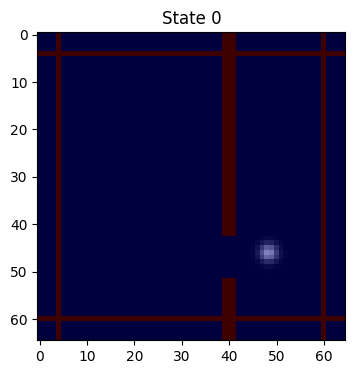

Action 0: [-1.686392  -0.3767559]

--------------------------------------------------



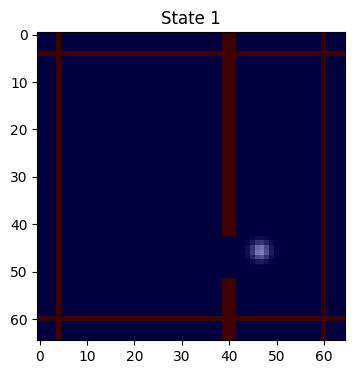

Action 1: [-0.5680665   0.16482288]

--------------------------------------------------



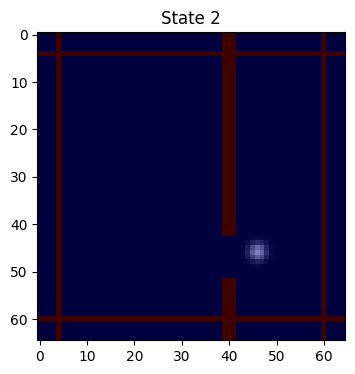

Action 2: [-0.24732384  0.02939416]

--------------------------------------------------



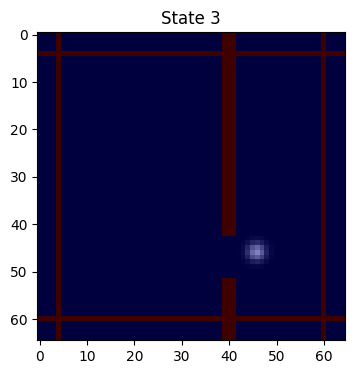

Action 3: [-1.093949    0.16826916]

--------------------------------------------------



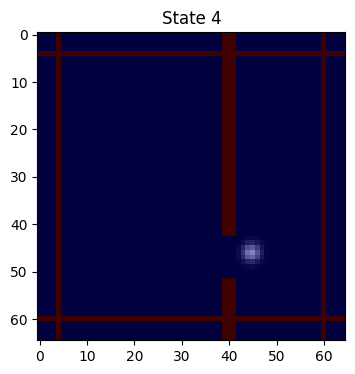

Action 4: [-0.87830323  0.4708313 ]

--------------------------------------------------



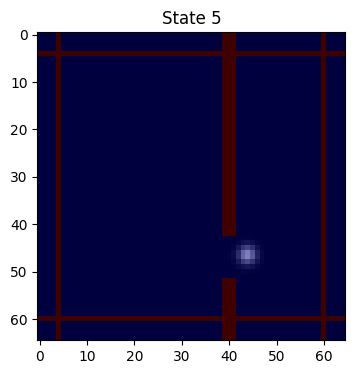

Action 5: [-1.1763254   0.15208994]

--------------------------------------------------



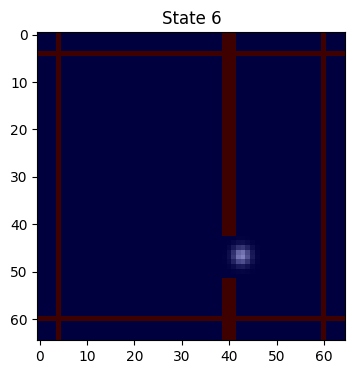

Action 6: [-0.7529415  -0.09688248]

--------------------------------------------------



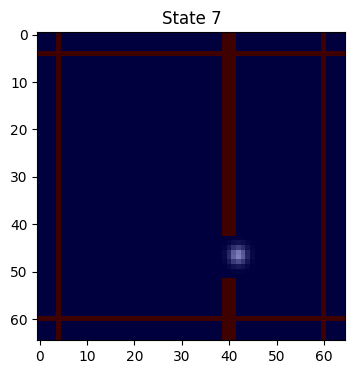

Action 7: [-0.98386157 -0.09757787]

--------------------------------------------------



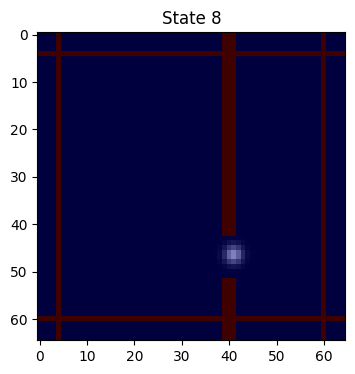

Action 8: [-0.60751474  0.30309436]

--------------------------------------------------



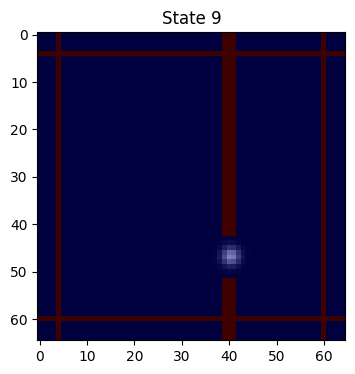

Action 9: [-0.70486116  0.55141664]

--------------------------------------------------



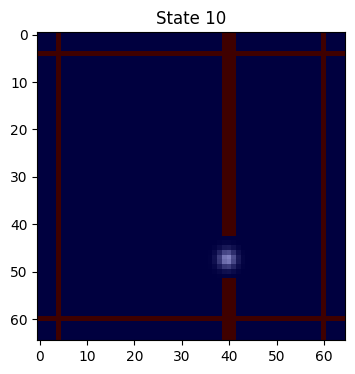

Action 10: [-0.76688117  1.6276654 ]

--------------------------------------------------



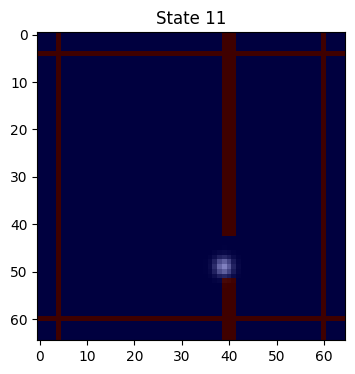

Action 11: [0.21143144 1.1943645 ]

--------------------------------------------------



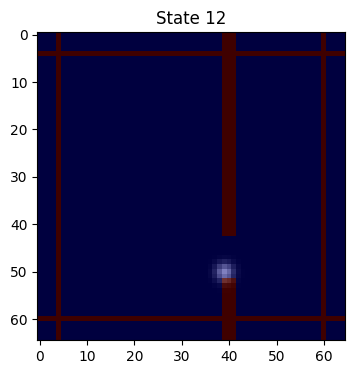

Action 12: [0.4399782 0.7403319]

--------------------------------------------------



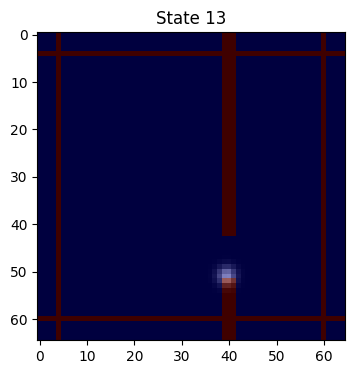

Action 13: [0.6310008 1.1417454]

--------------------------------------------------



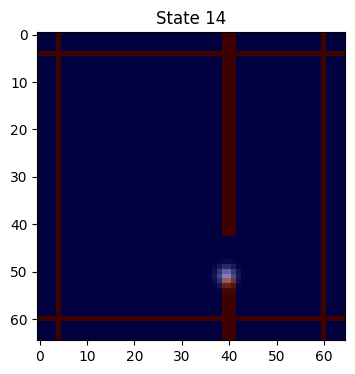

Action 14: [0.31716084 0.34917063]

--------------------------------------------------



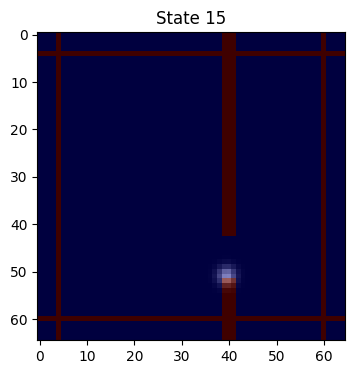

Action 15: [0.5745389 0.4427163]

--------------------------------------------------



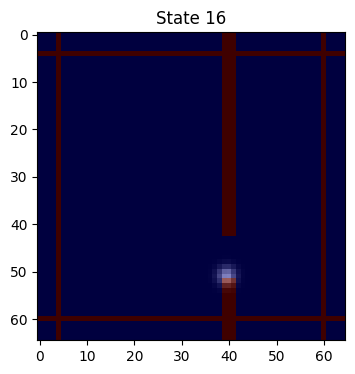

No action (final state)

--------------------------------------------------



In [11]:
debug_trajectory_visualization(dl,1, debug=True)